In [259]:
from logicqubit.logic import *
from math import *

In [260]:
def qft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], pi/float(2**(i-j)))
        qr[i].H()
        
def iqft(qr): # transformada quântica de Fourier inversa
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], -pi/float(2**(i-j)))
        qr[i].H()
        
def swap(s1, s2):
    s2.CX(s1)
    s1.CX(s2)
    s2.CX(s1)

In [261]:
N=15
a=7
psi = [bin(a**x % N)[2:].zfill(4) for x in range(N)]
psi

['0001',
 '0111',
 '0100',
 '1101',
 '0001',
 '0111',
 '0100',
 '1101',
 '0001',
 '0111',
 '0100',
 '1101',
 '0001',
 '0111',
 '0100']

In [537]:
# f(x) = 7^x mod 15
# truth table
# x   - y
# 000 - 0001
# 001 - 0111
# 010 - 0100
# 011 - 1101
# 100 - 0001
# 101 - 0111
# 110 - 0100
# 111 - 1011

logicQuBit  = LogicQuBit(7, first_left=True)

x1 = Qubit()
x2 = Qubit()
x3 = Qubit()

y1 = Qubit()
y2 = Qubit()
y3 = Qubit()
y4 = Qubit()

x1.H()
x2.H()
x3.H()

oracle = Oracle([x1, x2, x3])
oracle.addTable(y1, ['011', '111'])
oracle.addTable(y2, ['001', '010', '011', '101','110'])
oracle.addTable(y3, ['001', '101', '111'])
oracle.addTable(y4, ['000', '001', '011', '100','101','111'])

logicQuBit.addOracle(oracle)
logicQuBit.PrintOperations()

iqft([x1,x2,x3])
swap(x1,x3)

['H(1)', 'H(2)', 'H(3)', 'CCX(2,3,4)', 'CCX(2,3,5)', 'CX(2,5)', 'CX(3,5)', 'CCX(2,3,6)', 'CX(3,6)', 'CCX(2,3,7)', 'CX(2,7)', 'X(7)']


In [538]:
psi = x1.getPsiAtAngles(degree = True)
psi = {bin(i)[2:].zfill(7):value for i,value in enumerate(psi)}

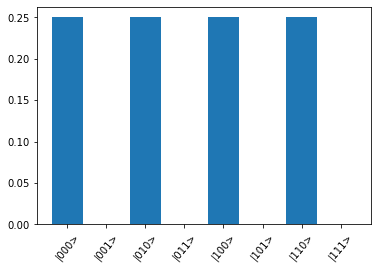

[(0.24999999999999978+0j), (9.682320048931733e-38+0j), (0.24999999999999978+0j), (9.682320048931733e-38+0j), (0.24999999999999978+0j), (9.682320048931733e-38+0j), (0.24999999999999978+0j), (9.682320048931733e-38+0j)]


In [539]:
#res = logicQuBit.Measure([y1,y2,y3,y4], True)
res = logicQuBit.Measure([x1,x2,x3], True)
logicQuBit.Plot()
print(res)

In [540]:
values = [i/8 for i,value in enumerate(res) if res[i]>0.2]
values

[0.0, 0.25, 0.5, 0.75]

In [541]:
def continued_fraction(value, limit=10):
    count = 0
    while count < limit:
        count += 1
        integer = int(round(value,10))
        fraction = value - integer
        yield integer
        if fraction > 1e-5:
            value = 1.0/fraction
        else:
            break
            
def find_r(values):
    for value in values:
        cf = list(continued_fraction(value))
        if len(cf) > 1:
            if len(cf) > 2:
               r = (cf[1]*cf[2]+1) # truncate
            else:
               r = cf[1] 
            yield r
            
def truncate_list(mlist, limit=10):
    yield v[0]
    for i,value in enumerate(mlist[1:]):
        if abs(value-v[i-1]) < limit:
            yield value
        else:
            break
            
def sum_back(mlist):
    mlist = list(mlist)
    mlist.reverse()
    v0 = mlist[0]
    for v in mlist[1:]:
        v0=(v0*v+1)/v0
    return v0

In [542]:
r_list = list(find_r(values))

In [543]:
r = max(set(r_list), key = r_list.count)
r

4

In [544]:
test = a**r % N
if test == 1:
    print("a**r % N = "+str(test)+", r é par!")

f1 = a**(r/2)+1 
f2 = a**(r/2)-1
print(f1, f2)

# fatores primos
f1 = gcd(int(f1), N) 
f2 = gcd(int(f2), N) 
print(f1, f2, f1*f2)

a**r % N = 1, r é par!
50.0 48.0
5 3 15
